In [1]:
!nvidia-smi

Mon Jun 10 13:09:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196 -q

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uxKFsGbMHLydWokPnxHR")
project = rf.workspace("depondfi-95ikt").project("training-udzaa")
version = project.version(3)
dataset = version.download("yolov8")

from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640)

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 864.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Training-3 in yolov8:: 100%|██████████| 1131/1131 [00:00<00:00, 4534.89it/s]
100%|██████████| 6.51M/6.51M [00:00<00:00, 74.3MB/s]
New https://pypi.org/project/ultralytics/8.2.30 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=/content/datasets/Training-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, sh

In [6]:
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))

results = model(os.path.join(f"{dataset.location}/test/images", random_file))

print(results[0].keypoints)


image 1/1 /content/datasets/Training-3/test/images/frame_1257_jpg.rf.051b33e32d66de47a715a25ff12724e9.jpg: 640x640 1 fish, 16.7ms
Speed: 1.8ms preprocess, 16.7ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.6861, 0.8066, 0.7640, 0.7753, 0.6338, 0.5899, 0.4546, 0.4808, 0.5034]], device='cuda:0')
data: tensor([[[4.9669e+02, 6.3163e+02, 6.8613e-01],
         [4.8012e+02, 5.9569e+02, 8.0658e-01],
         [4.4384e+02, 4.8776e+02, 7.6401e-01],
         [4.3914e+02, 5.5041e+02, 7.7526e-01],
         [4.3511e+02, 6.0006e+02, 6.3383e-01],
         [4.0889e+02, 5.3284e+02, 5.8988e-01],
         [0.0000e+00, 0.0000e+00, 4.5463e-01],
         [0.0000e+00, 0.0000e+00, 4.8085e-01],
         [3.8155e+02, 5.4364e+02, 5.0340e-01]]], device='cuda:0')
has_visible: True
orig_shape: (640, 640)
shape: torch.Size([1, 9, 3])
xy: tensor([[[496.6897, 631.6322],
         [480.1178, 595.6909],
         [443.8363, 487.7580],
         [439.1354, 550.4095],
         [435.1150, 600.0605],
         [408.8896, 532.8427],
         [  0.0000,   0.0000],
         [  0.0000,   0.0000],
         [381.5514, 543.6384]]], device='cuda:0')
xyn: tensor(

In [13]:
import zipfile
import os
from ultralytics import YOLO

# Path to the test dataset zip file
zip_file_path = "/content/DePondFi'24-Test-Phase-I (2).zip"

# Extraction directory for the test dataset
extract_dir ="/content/Test_Images/Images/DePondFi'24-Test-Phase-I/DePondFi'24-Test-Phase-I/Images"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted test dataset to: {extract_dir}")

# Load the trained YOLO model
model = YOLO('runs/pose/train/weights/best.pt')

# Define the path to the directory containing the test images
test_images_dir = extract_dir

# Perform inference on the test images
results = model.predict(source=test_images_dir, save=True)

print("Inference completed. Results saved.")

# Verify the output directory of the inference results
output_dir = 'runs/pose/predict'
if os.path.exists(output_dir):
    print(f"Inference results saved in: {output_dir}")
else:
    print("Inference results directory not found.")

# Create a zip file containing the inference results
def zip_dir(dir_path, zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(dir_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(dir_path, '..')))

# Path for the zip file containing the inference results
output_zip_path = '/content/inference_results.zip'

# Zip the output directory
zip_dir(output_dir, output_zip_path)

print(f"Inference results zip file created: {output_zip_path}")


Extracted test dataset to: /content/Test_Images/Images/DePondFi'24-Test-Phase-I/DePondFi'24-Test-Phase-I/Images



image 1/120 /content/Test_Images/Images/DePondFi'24-Test-Phase-I/DePondFi'24-Test-Phase-I/Images/Screenshot-2024-04-22-201557_png_jpg.rf.8f2a4c9843a8da708afbf0c62a3eede6.jpg: 640x640 2 fishs, 15.0ms
image 2/120 /content/Test_Images/Images/DePondFi'24-Test-Phase-I/DePondFi'24-Test-Phase-I/Images/Screenshot-2024-04-22-202611_png_jpg.rf.e57ebce5044a9f0661acc240af6a23a0.jpg: 640x640 3 fishs, 15.5ms
image 3/120 /content/Test_Images/Images/DePondFi'24-Test-Phase-I/DePondFi'24-Test-Phase-I/Images/Screenshot-2024-04-22-204332_png_jpg.rf.541df94b1a1bf0a54830577364efd30b.jpg: 640x640 2 fishs, 8.5ms
image 4/120 /content/Test_Images/Images/DePondFi'24-Test-Phase-I/DePondFi'24-Test-Phase-I/Images/Screenshot-2024-04-22-204358_png_jpg.rf.f46e972f571511894b73d7181fa49614.jpg: 640x640 1 fish, 8.6ms
image 5/120 /content/Test_Images/Images/DePondFi'24-Test-Phase-I/DePondFi'24-Test-Phase-I/Images/Screenshot-2024-04-22-204446_png_jpg.rf.bc5b89da06cbcb35157955a753153205.jpg: 640x640 8 fishs, 9.2ms
image 6/

Inference completed. Results saved.
Inference results saved in: runs/pose/predict
Inference results zip file created: /content/inference_results.zip


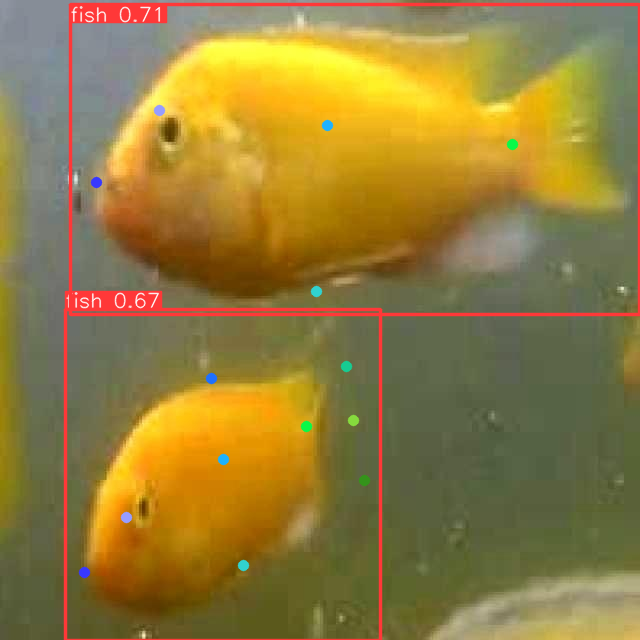

In [14]:
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)

Our model successfully identified keypoints in the image.

In [16]:
import shutil
import os

# Path to the folder to be zipped
folder_to_zip = '/content/datasets/runs'

# Path to save the zipped file
output_zip_file = '/content/datasets/runs.zip'

# Ensure the directory exists
if os.path.exists(folder_to_zip):
    # Creating a zip archive of the specified folder
    shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)
    print(f"Folder zipped successfully: {output_zip_file}")
else:
    print(f"Directory does not exist: {folder_to_zip}")


Folder zipped successfully: /content/datasets/runs.zip
